<a href="https://colab.research.google.com/github/ranj10/Identifying_most_valued_customers/blob/main/Identifying_most_valued_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
demogrph=pd.read_excel("/content/demographic.xlsx")

<ipython-input-2-d6bc5a2f4726>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  demogrph=pd.read_excel("/content/demographic.xlsx")


In [ ]:
demogrph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
demogrph.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [ ]:
demogrph.shape

(4000, 13)

In [ ]:
demogrph.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [ ]:
demogrph=demogrph.drop(['default'],axis=1)

In [ ]:
demogrph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [ ]:
demogrph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
demogrph.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [ ]:
demogrph.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Length: 4000, dtype: bool

In [ ]:
address=pd.read_excel("/content/address.xlsx")

In [ ]:
address.shape

(3999, 6)

In [ ]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [ ]:
address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [ ]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
newcust=pd.read_excel("/content/newcustomer.xlsx")

<ipython-input-18-d8ea84f48f39>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  newcust=pd.read_excel("/content/newcustomer.xlsx")


In [ ]:
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [ ]:
newcust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [ ]:
newcust.shape

(1000, 18)

In [ ]:
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
newcust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [ ]:
newcust.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [ ]:
transaction=pd.read_excel("/content/transaction.xlsx")

In [ ]:
transaction.shape

(20000, 13)

In [ ]:
transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [ ]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
transaction.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

In [ ]:
combined1=pd.merge(demogrph,address)

In [ ]:
combined1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
combined1.shape

(3996, 17)

In [ ]:
combined2=pd.merge(combined1,transaction ,on='customer_id')

In [ ]:
combined2.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
5,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
6,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
7,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337.0
8,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0
9,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0


In [ ]:
combined2.shape

(19968, 29)

In [ ]:
combined2.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  446
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                           

In [ ]:
combined2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

In [ ]:
combined2.duplicated().sum()

0

In [ ]:
combined2['customer_id'].shape

(19968,)

In [ ]:
combined2['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [ ]:
combined2['gender']=combined2['gender'].replace('Male','M')

In [ ]:
combined2['gender']=combined2['gender'].replace('Female','F')

In [ ]:
combined2['gender']=combined2['gender'].replace('Femal','F')

In [ ]:
combined2['gender'].nunique()


3

In [ ]:
combined2['gender'].value_counts()

F    9997
M    9516
U     455
Name: gender, dtype: int64

In [ ]:
combined2['gender'].agg(['count','size','nunique'])

count      19968
size       19968
nunique        3
Name: gender, dtype: int64

In [ ]:
combined2.nunique().sort_values(ascending=False)[:29]

transaction_id                         19968
customer_id                             3489
address                                 3487
last_name                               3263
DOB                                     3047
first_name                              2835
postcode                                 835
transaction_date                         364
list_price                               294
job_title                                195
product_id                               101
standard_cost                            100
product_first_sold_date                  100
past_3_years_bike_related_purchases      100
tenure                                    22
property_valuation                        12
job_industry_category                      9
brand                                      6
state                                      5
product_line                               4
wealth_segment                             3
product_class                              3
product_si

In [ ]:
combined2['job_industry_category'].value_counts()

Manufacturing         4014
Financial Services    3880
Health                3099
Retail                1758
Property              1289
IT                    1076
Entertainment          698
Argiculture            578
Telecommunications     354
Name: job_industry_category, dtype: int64

In [ ]:
combined2['wealth_segment'].value_counts()

Mass Customer        10029
High Net Worth        5081
Affluent Customer     4858
Name: wealth_segment, dtype: int64

In [ ]:
combined2['owns_car'].value_counts()

Yes    10042
No      9926
Name: owns_car, dtype: int64

In [ ]:
combined2['tenure'].value_counts()

7.0     1190
5.0     1096
11.0    1088
16.0    1067
12.0    1060
8.0     1032
14.0    1019
9.0      995
17.0     985
10.0     985
13.0     973
18.0     959
6.0      953
4.0      929
15.0     908
1.0      869
19.0     837
3.0      819
2.0      736
20.0     492
21.0     275
22.0     255
Name: tenure, dtype: int64

In [ ]:
combined2['property_valuation'].value_counts()

8     3342
9     3260
10    2850
7     2371
11    1396
6     1181
5     1130
4     1070
12     971
3      903
1      807
2      687
Name: property_valuation, dtype: int64

In [ ]:
combined2['brand'].value_counts()

Solex             4248
Giant Bicycles    3308
WeareA2B          3290
OHM Cycles        3039
Trek Bicycles     2983
Norco Bicycles    2905
Name: brand, dtype: int64

In [ ]:
combined2['product_line'].value_counts()

Standard    14156
Road         3963
Touring      1234
Mountain      420
Name: product_line, dtype: int64

In [ ]:
combined2['product_class'].value_counts()

medium    13802
high       3012
low        2959
Name: product_class, dtype: int64

In [ ]:
combined2['product_size'].value_counts()

medium    12969
large      3970
small      2834
Name: product_size, dtype: int64

In [ ]:
combined2['past_3_years_bike_related_purchases'].value_counts()

16    291
80    273
48    257
20    256
2     256
     ... 
3     133
92    118
8     115
85    115
86    108
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [ ]:
combined2['first_name'].value_counts()

Corabelle    36
Tobe         31
Emlyn        29
Lindsay      28
Max          26
             ..
Trev          1
Gayler        1
Cale          1
Cilka         1
Dave          1
Name: first_name, Length: 2835, dtype: int64

In [ ]:
from datetime import date
date.today()

datetime.date(2022, 12, 31)

In [ ]:
combined2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [ ]:
combined2['year_of_birth']=pd.DatetimeIndex(combined2['DOB']).year

In [ ]:
combined2.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year_of_birth
19963,3500,Josy,Fleeman,F,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,1967.0
19964,3500,Josy,Fleeman,F,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,1967.0
19965,3500,Josy,Fleeman,F,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,1967.0
19966,3500,Josy,Fleeman,F,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,1967.0
19967,3500,Josy,Fleeman,F,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0,1967.0


In [ ]:
combined2['deceased_indicator'].value_counts()

N    19960
Y        8
Name: deceased_indicator, dtype: int64

In [ ]:

alive=[]
for i in combined2['deceased_indicator']:
  if i =='N':
    alive.append(i)

print(len(alive))
combined2[alive]=alive

19960


In [ ]:
combined2.drop(columns= ['DOB','N'])

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year_of_birth
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,1953.0
1,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,1953.0
2,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,1953.0
3,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,1953.0
4,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,1953.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,3500,Josy,Fleeman,F,71,NaN,Entertainment,Affluent Customer,N,No,...,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,1967.0
19964,3500,Josy,Fleeman,F,71,NaN,Entertainment,Affluent Customer,N,No,...,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,1967.0
19965,3500,Josy,Fleeman,F,71,NaN,Entertainment,Affluent Customer,N,No,...,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,1967.0
19966,3500,Josy,Fleeman,F,71,NaN,Entertainment,Affluent Customer,N,No,...,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,1967.0


In [ ]:
combined2.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date,year_of_birth
count,19968.000000,19968.000000,19522.000000,19968.000000,19968.000000,19968.000000,19968.000000,19609.000000,19968.000000,19773.000000,19773.000000,19522.000000
mean,1740.254307,48.757412,10.681949,2987.623347,7.516376,9997.846504,45.365986,0.500688,1107.780004,556.091050,38198.741364,1977.083035
std,1009.819066,28.611359,5.674631,851.306647,2.824783,5773.929973,30.750115,0.500012,582.852548,405.966472,2874.856871,12.921055
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000,1843.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000,1968.000000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38216.000000,1977.000000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000,40672.000000,1987.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000,2002.000000


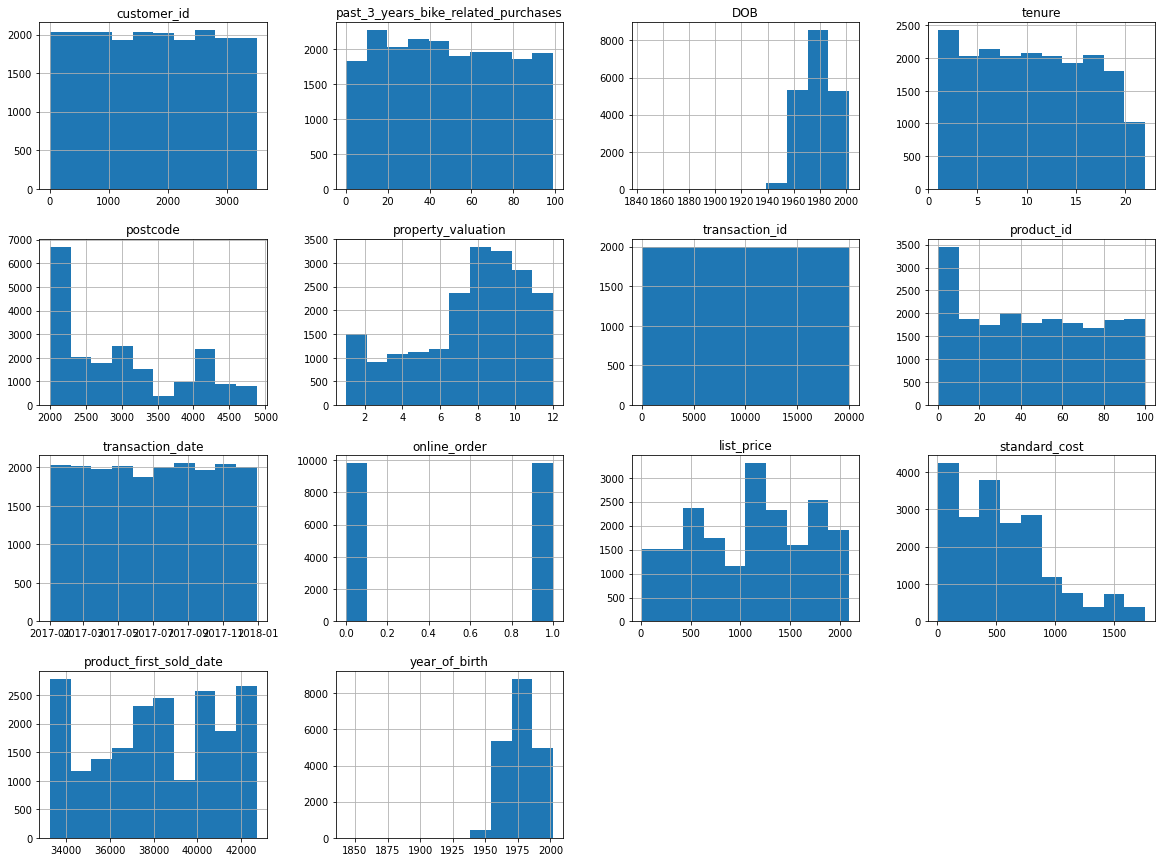

In [ ]:
#checking outliers and skewof all numirical features through histogram
combined2.hist(figsize=(20,15))
plt.show()

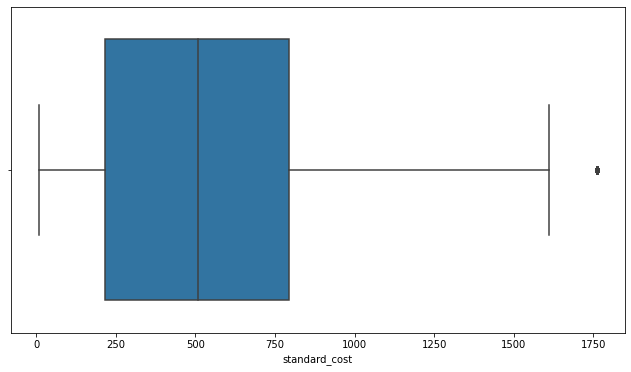

In [ ]:
#cheking outliars of single feature through boxplot
plt.figure(figsize=(11,6))
sns.boxplot(x=combined2['standard_cost'])
plt.show()

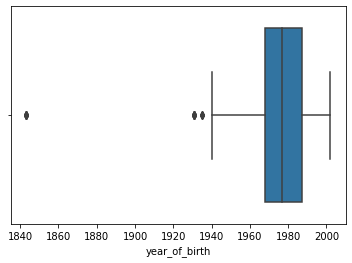

In [ ]:
sns.boxplot(x=combined2['year_of_birth'])

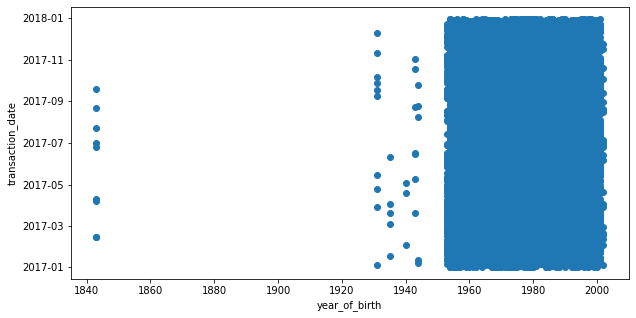

In [ ]:
#checking outliars of 2 features through scatter plot
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(combined2['year_of_birth'], combined2['transaction_date'])
ax.set_xlabel('year_of_birth')
ax.set_ylabel('transaction_date')
plt.show()

In [ ]:
combined2.describe([.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9])

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date,year_of_birth
count,19968.000000,19968.000000,19522.000000,19968.000000,19968.000000,19968.000000,19968.000000,19609.000000,19968.000000,19773.000000,19773.000000,19522.000000
mean,1740.254307,48.757412,10.681949,2987.623347,7.516376,9997.846504,45.365986,0.500688,1107.780004,556.091050,38198.741364,1977.083035
std,1009.819066,28.611359,5.674631,851.306647,2.824783,5773.929973,30.750115,0.500012,582.852548,405.966472,2874.856871,12.921055
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000,1843.000000
10%,346.000000,10.000000,3.000000,2090.000000,3.000000,1998.700000,3.000000,0.000000,235.630000,99.590000,34115.000000,1959.000000
20%,690.000000,19.000000,5.000000,2155.000000,5.000000,3997.400000,12.000000,0.000000,533.510000,161.600000,35160.000000,1965.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000,1968.000000
30%,1033.000000,29.000000,7.000000,2233.000000,7.000000,5998.100000,23.000000,0.000000,742.540000,270.300000,36334.000000,1971.000000
40%,1395.800000,38.000000,9.000000,2519.000000,7.000000,7997.800000,34.000000,0.000000,980.370000,388.720000,37659.000000,1974.000000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38216.000000,1977.000000


In [ ]:
 #removing outliars

 combined2= combined2[~((combined2.standard_cost < 100) | (combined2.standard_cost > 1500))]


In [ ]:
combined2['standard_cost'].describe()

count    16681.000000
mean       561.951685
std        317.645871
min        101.580000
25%        297.430000
50%        525.330000
75%        778.690000
max       1479.110000
Name: standard_cost, dtype: float64

In [ ]:
#Capping(replacing) outliars

lower_percent=0.10
low=combined2.year_of_birth.quantile(lower_percent)


In [ ]:
low

1959.0

In [ ]:
combined2['year_of_birth']=np.where(combined2['year_of_birth'] <= low,low,combined2['year_of_birth'])

<ipython-input-79-30bf7a6285b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined2['year_of_birth']=np.where(combined2['year_of_birth'] <= low,low,combined2['year_of_birth'])


In [ ]:
combined2['year_of_birth'].describe()

count    16490.000000
mean      1977.441904
std         12.093428
min       1959.000000
25%       1968.000000
50%       1977.000000
75%       1987.000000
max       2002.000000
Name: year_of_birth, dtype: float64

In [ ]:
#printing outliars through IQR method

#getting IQR range of each column
from scipy import stats
combined3c=combined2.copy()
Q1 = combined3c['standard_cost'].quantile(0.25)
Q3 = combined3c['standard_cost'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)


297.43
778.69
481.26000000000005


In [ ]:
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
print(min)
print(max)

-424.4600000000001
1500.5800000000002


In [ ]:
outliar=[]

for x in combined3c['standard_cost']:
  if x <= min or x >=max:
    outliar.append(x)

print(outliar)
#result wont print as the outliar alredy removed above

[]


In [ ]:
combined2_grouped=combined2.groupby(by='customer_id')['standard_cost','list_price'].sum()
combined2_grouped.head()

<ipython-input-84-1cb54b454d08>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined2_grouped=combined2.groupby(by='customer_id')['standard_cost','list_price'].sum()


,standard_cost,list_price
customer_id,,
1,4481.32,7292.26
2,1922.81,4149.07
4,827.15,1047.72
5,3508.26,5903.20
6,1985.14,5931.69


In [ ]:
combined2_grouped2=combined2.groupby(by='customer_id')[combined2.columns[2:]].sum()
combined2_grouped2.head()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date,year_of_birth
customer_id,,,,,,,,,,,
1,837,99.0,18144,90,107761,327,5.0,7292.26,4481.32,334059.0,17631.0
2,243,48.0,6459,30,25415,112,1.0,4149.07,1922.81,116327.0,5940.0
4,66,14.0,8422,18,27089,157,1.0,1047.72,827.15,72017.0,3922.0
5,336,48.0,14688,24,47818,289,2.0,5903.20,3508.26,224166.0,11862.0
6,175,65.0,16080,45,25964,143,2.0,5931.69,1985.14,194209.0,9830.0


In [ ]:
combined2.sort_values(by=['standard_cost'],ascending=False)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year_of_birth,N
7119,1234,Rancell,Yven,M,87,1965-04-19,Geologist I,NaN,Mass Customer,N,...,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34586.0,1965.0,N
3739,645,Randolf,Durant,M,50,1971-04-01,Analyst Programmer,NaN,High Net Worth,N,...,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34586.0,1971.0,N
10388,1809,Reba,Southon,F,67,1961-01-26,Programmer II,Health,Mass Customer,N,...,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,35378.0,1961.0,N
12781,2226,Hedvig,Flatt,F,10,1955-07-22,Biostatistician II,Entertainment,Mass Customer,N,...,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34586.0,1959.0,N
12787,2227,Duff,Kemble,M,45,1976-07-16,Systems Administrator I,Property,Affluent Customer,N,...,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34165.0,1976.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19341,3384,Wesley,Nichols,M,11,1996-03-05,NaN,NaN,Mass Customer,N,...,Approved,NaN,NaN,NaN,NaN,1695.42,NaN,NaN,1996.0,N
19345,3385,Ronda,NaN,F,23,1975-02-10,Systems Administrator III,Argiculture,Mass Customer,N,...,Approved,NaN,NaN,NaN,NaN,687.90,NaN,NaN,1975.0,N
19412,3399,Hillyer,Biddulph,M,95,1996-05-10,VP Accounting,Financial Services,Mass Customer,N,...,Approved,NaN,NaN,NaN,NaN,237.44,NaN,NaN,1996.0,N
19548,3421,Ronalda,McGeechan,F,60,1962-12-17,Computer Systems Analyst II,Health,Affluent Customer,N,...,Approved,NaN,NaN,NaN,NaN,731.41,NaN,NaN,1962.0,N


In [ ]:
corr = combined2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-104-efbc8f35c0b2>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date,year_of_birth
customer_id,1.00,0.00,-0.02,0.02,0.00,0.01,0.00,0.01,0.00,-0.00,0.00,0.03
past_3_years_bike_related_purchases,0.00,1.00,-0.02,-0.01,0.01,-0.00,0.00,0.00,0.01,-0.01,0.00,0.04
tenure,-0.02,-0.02,1.00,0.01,-0.02,0.01,-0.00,0.01,0.00,-0.01,0.00,-0.45
postcode,0.02,-0.01,0.01,1.00,-0.52,0.01,0.02,-0.00,0.02,0.01,0.01,0.02
property_valuation,0.00,0.01,-0.02,-0.52,1.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.02
transaction_id,0.01,-0.00,0.01,0.01,0.00,1.00,-0.01,0.00,-0.00,0.01,0.00,0.00
product_id,0.00,0.00,-0.00,0.02,-0.00,-0.01,1.00,-0.00,0.03,0.06,-0.05,0.00
online_order,0.01,0.00,0.01,-0.00,-0.00,0.00,-0.00,1.00,-0.00,0.01,-0.00,-0.00
list_price,0.00,0.01,0.00,0.02,-0.01,-0.00,0.03,-0.00,1.00,0.50,0.05,-0.01
standard_cost,-0.00,-0.01,-0.01,0.01,-0.00,0.01,0.06,0.01,0.50,1.00,-0.01,-0.00


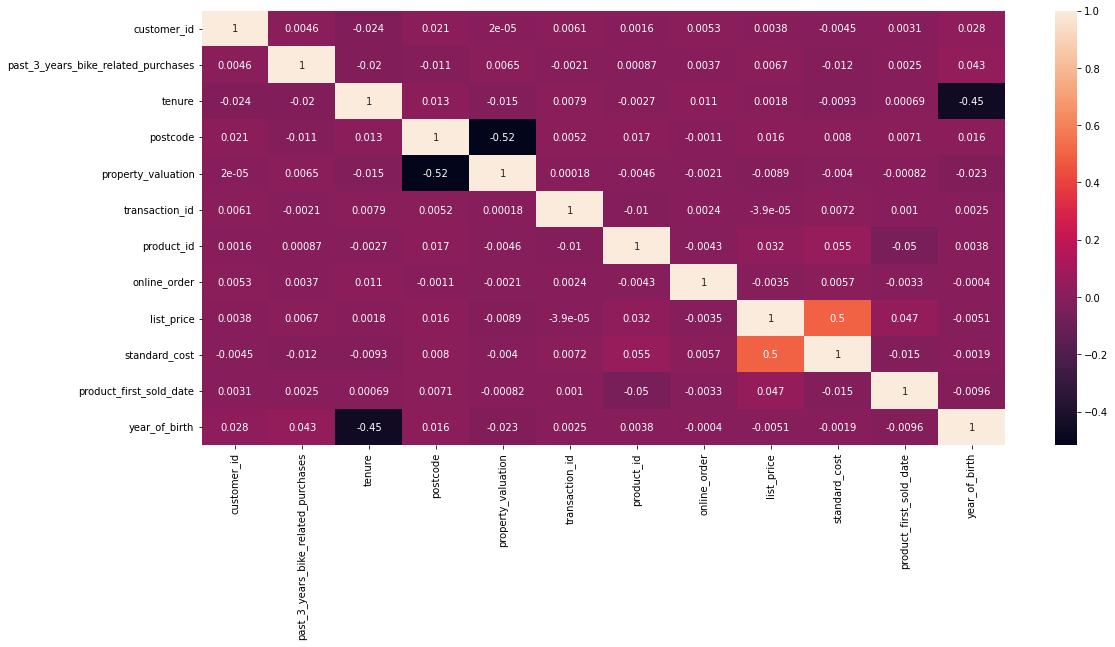

In [ ]:
corr = combined2.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

In [ ]:
importance=mutual_info_classif(X,Y)
feat_importance=pd.series(importance, combined2.columns[0:len(combined2.columns)-1])
feat_importance.plot(kind='barh',color='teal')
plt.show()


NameError: ignored

In [ ]:
outcome = newcust['Value']
train1 = combined2

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(train1 , newcust , test_size = 0.10,random_state =2)

ValueError: ignored